In [6]:
import pandas as pd
import numpy as np

import wrangle_zillow

import seaborn as sns
import matplotlib.pyplot as plt



from scipy.stats import zscore, iqr, percentileofscore, scoreatpercentile

In [166]:
df = wrangle_zillow.get_zillow_data()

In [8]:
nulls_by_col = wrangle_zillow.nulls_by_col(df)

In [24]:
df.regionidneighborhood.isnull().sum()

46606

In [165]:
df.columns

Index(['id', 'parcelid', 'airconditioningtypeid', 'architecturalstyletypeid',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardb

In [29]:
df.taxvaluedollarcnt.dropna(inplace=True)

In [11]:
# imputer, scaler, train, validate, test = prep_zillow(df)

In [12]:
# train.head()

NameError: name 'train' is not defined

In [15]:
from scipy.stats import zscore, iqr, percentileofscore, scoreatpercentile


# create a function that takes in a column and a method and returns outliers
IQR = (df.bathroomcnt.quantile(.75) - df.bathroomcnt.quantile(.25))*3


3.0

In [17]:
zscore(df.bathroomcnt)

array([ 1.20546271, -1.30276568, -0.29947432, ..., -1.30276568,
       -0.29947432, -0.29947432])

In [18]:
iqr(df.bathroomcnt)

1.0

In [19]:
percentileofscore(df.bathroomcnt, score=6)

99.31425625161124

In [20]:
df.columns

Index(['id', 'parcelid', 'airconditioningtypeid', 'architecturalstyletypeid',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardb

In [30]:
def sum_outliers(column, iqr_k=5, std_k=2):
    IQR = iqr(column) * iqr_k
    print(f'IQR is {IQR}')
    iqr_mask = (column > column.median() + IQR)
    zscore_mask = zscore(column) > std_k
    return iqr_mask.sum(), zscore_mask.sum(), 100 - percentileofscore(column, score=IQR)
      

In [31]:
sum_outliers(df.taxvaluedollarcnt)

IQR is 1810505.0


(1329, 1977, 2.5006767295273136)

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

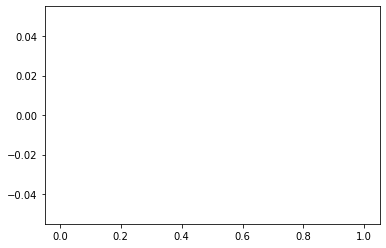

In [124]:
plt.hist(zscore(df.taxvaluedollarcnt), bins=10)

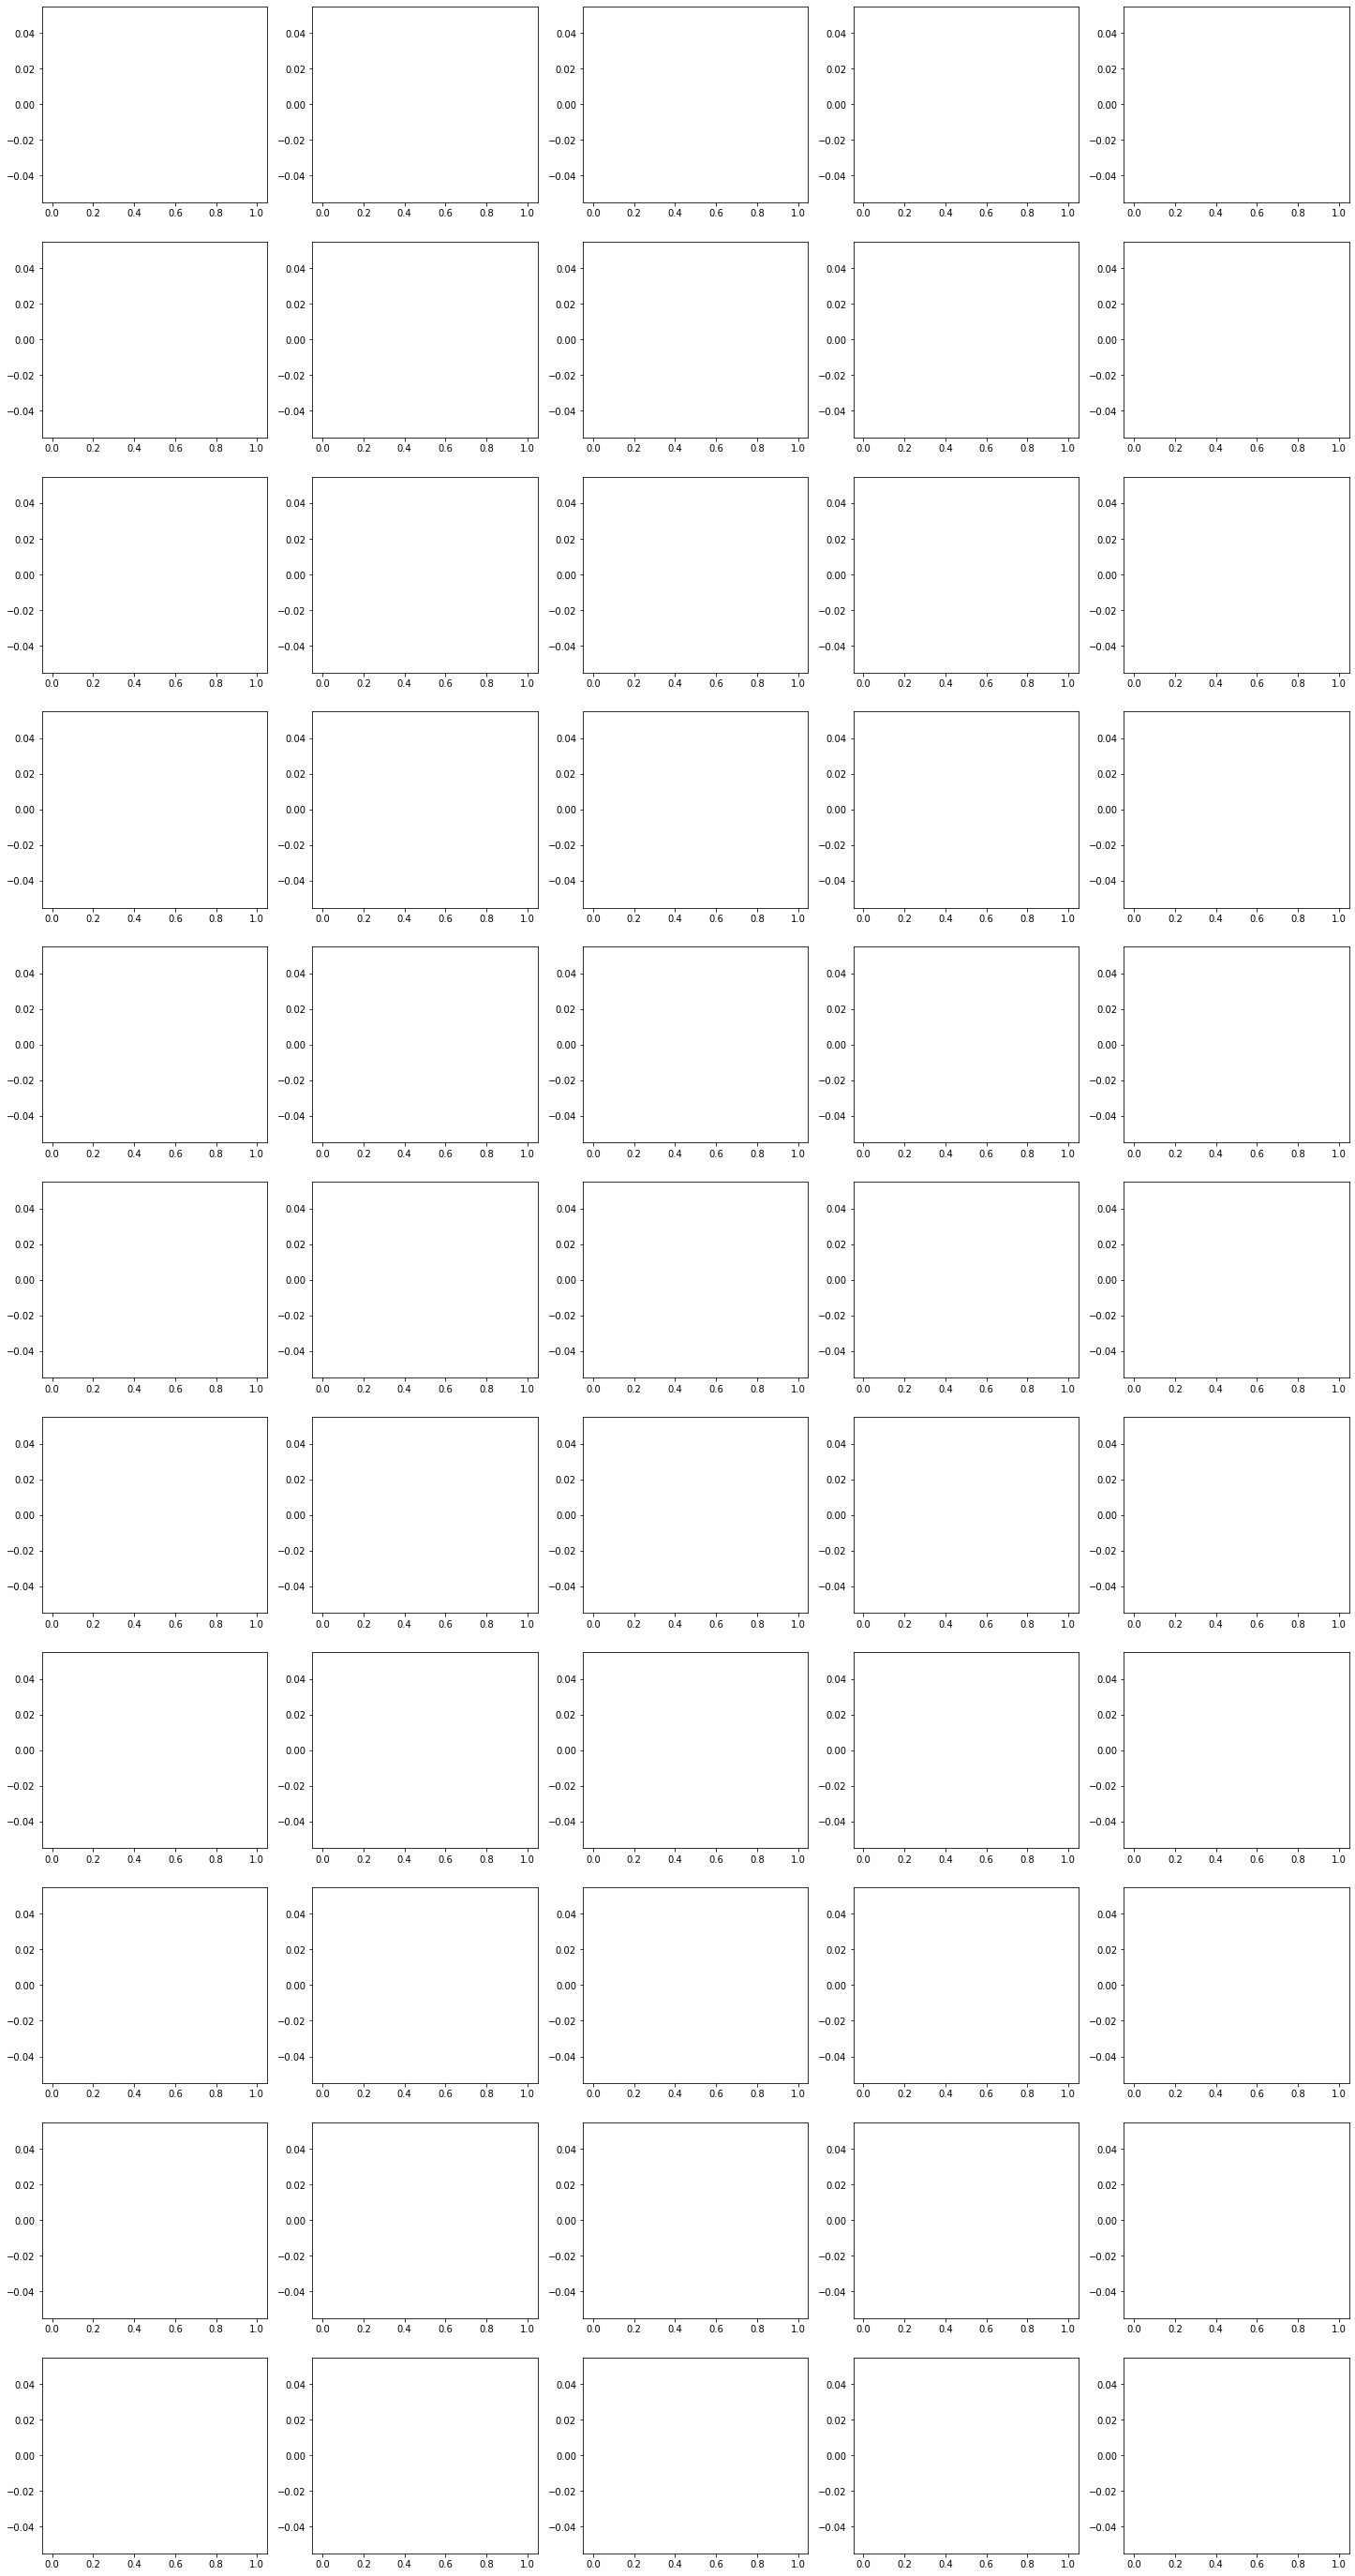

In [121]:
i = 0
f = plt.figure(figsize=(25,50))
for x in df.columns: 
    if df[x].dtype == 'float64':
        df.dropna(inplace=True)
        i += 1
        f.add_subplot(11,5, i)
        plt.hist(zscore(df[x].nsmallest(77000)), bins=30)

In [126]:
def max_outlier(column):
    z_score = pd.Series(zscore(column))
    return z_score.nlargest(20)

In [131]:
max_outlier(df.bathroomcnt)

Series([], dtype: float64)

In [43]:
zscore(df.taxvaluedollarcnt).max()

74.2915791953803

In [44]:
df.taxvaluedollarcnt.max()

49061236.0

In [45]:
df.taxvaluedollarcnt.nlargest(20)

8550     49061236.0
16694    25381250.0
7823     24345695.0
36562    23858374.0
45588    22589311.0
76658    20203475.0
11050    19280700.0
39995    18812604.0
7193     16814671.0
14190    16497812.0
76998    15736374.0
37195    15623925.0
59423    15618488.0
66648    15533020.0
33248    13852918.0
72352    13600098.0
27914    13523065.0
16213    13198250.0
28702    13191321.0
43454    13128583.0
Name: taxvaluedollarcnt, dtype: float64

In [65]:
df.taxvaluedollarcnt.dtype

dtype('float64')

In [74]:
# for i in range(0,25):
#     for x in df.columns:
#         if df[x].dtype == 'float64':
#             df[x].hist()
#     f.add_subplot(5,5, i+1)
#             df[x].hist()
# plt.tight_layout()
# plt.show()

IndentationError: unexpected indent (<ipython-input-74-1b12c1083118>, line 6)

In [132]:
# f = plt.figure(figsize=(25,20))
# for i in range(0,21):
#     if len(train.groupby(train.iloc[:,i+3])) < 5:
#         f.add_subplot(5,5, i+1)
#         sns.barplot(data=train, y="is_churn", x=train.iloc[:,i+3])
#         plt.title(train.columns[i+3])
# plt.tight_layout()
# plt.show()

In [91]:
for x in df.columns:
    print(df.columns[df[x].isnull().mean() <= .70])
    

[['id' 'parcelid' 'airconditioningtypeid' 'architecturalstyletypeid'
  'basementsqft' 'bathroomcnt' 'bedroomcnt' 'buildingclasstypeid'
  'buildingqualitytypeid' 'calculatedbathnbr' 'decktypeid'
  'finishedfloor1squarefeet' 'calculatedfinishedsquarefeet'
  'finishedsquarefeet12' 'finishedsquarefeet13' 'finishedsquarefeet15'
  'finishedsquarefeet50' 'finishedsquarefeet6' 'fips' 'fireplacecnt'
  'fullbathcnt' 'garagecarcnt' 'garagetotalsqft' 'hashottuborspa'
  'heatingorsystemtypeid' 'latitude' 'longitude' 'lotsizesquarefeet'
  'poolcnt' 'poolsizesum' 'pooltypeid10' 'pooltypeid2' 'pooltypeid7'
  'propertycountylandusecode' 'propertylandusetypeid'
  'propertyzoningdesc' 'rawcensustractandblock' 'regionidcity'
  'regionidcounty' 'regionidneighborhood' 'regionidzip' 'roomcnt'
  'storytypeid' 'threequarterbathnbr' 'typeconstructiontypeid' 'unitcnt'
  'yardbuildingsqft17' 'yardbuildingsqft26' 'yearbuilt' 'numberofstories'
  'fireplaceflag' 'structuretaxvaluedollarcnt' 'taxvaluedollarcnt'
  'as

# Outliers

- Using IQR instead of z-score beacuase IQR works with median
- if z-score is greater than 3 std above mean is 99.7% of data

In [167]:
from scipy.stats import zscore, iqr, percentileofscore, scoreatpercentile
#drop null values
df = wrangle_zillow.get_zillow_data()
df.isnull().sum()

id                              0
parcelid                        0
airconditioningtypeid       52573
architecturalstyletypeid    77373
basementsqft                77530
                            ...  
buildingclassdesc           77565
heatingorsystemdesc         28008
propertylandusedesc             0
storydesc                   77530
typeconstructiondesc        77357
Length: 68, dtype: int64

In [164]:
#determine if the column is numeric
list_of_float_columns = [x for x in df.columns if df[x].dtype == 'float64']
list_of_float_columns


,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc


In [179]:
#determine how many outliers in the column based on IQR at  1.5, 3 and 5
for x in list_of_float_columns:
    df[x].dropna()
    IQR_1_5 = iqr(df[x]) * 1.5
    IQR_3 = iqr(df[x]) * 3
    IQR_5 = iqr(df[x]) * 5
    perc_IQR_1_5 = percentileofscore(df[x], score = IQR_1_5)
    perc_IQR_3 = percentileofscore(df[x], score = IQR_1_5)
    perc_IQR_1_5 = percentileofscore(df[x], score = IQR_1_5)
    if IQR_3 > 0:
#         print (f' for column {x}:  IQR*1.5: {IQR_1_5}, IQR_3: {IQR_3}, IQR_5: {IQR_5}')
        print(f' for column {x}: percentile at 1.5: {perc_IQR_1_5}')
df.isnull().sum()
#determine percentage of column that is outside the IQR at 1.5, 3 and 5

# 3 std above mean is 99.7% of data

 for column bathroomcnt: percentile at 1.5: 18.37329208558907
 for column bedroomcnt: percentile at 1.5: 49.84532095901005
 for column fips: percentile at 1.5: 0.0
 for column latitude: percentile at 1.5: 0.0
 for column longitude: percentile at 1.5: 100.0
 for column propertylandusetypeid: percentile at 1.5: 0.0
 for column rawcensustractandblock: percentile at 1.5: 0.0
 for column regionidcounty: percentile at 1.5: 34.65197215777262
 for column logerror: percentile at 1.5: 89.61588038154163


id                              0
parcelid                        0
airconditioningtypeid       52573
architecturalstyletypeid    77373
basementsqft                77530
                            ...  
buildingclassdesc           77565
heatingorsystemdesc         28008
propertylandusedesc             0
storydesc                   77530
typeconstructiondesc        77357
Length: 68, dtype: int64

In [141]:
df.columns

Index(['id', 'parcelid', 'airconditioningtypeid', 'architecturalstyletypeid',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardb